## Model and Solving Differential Equations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlrd
from scipy import stats
import matplotlib.cm as cm
import matplotlib.colors as mcolors

Simple SIR model:

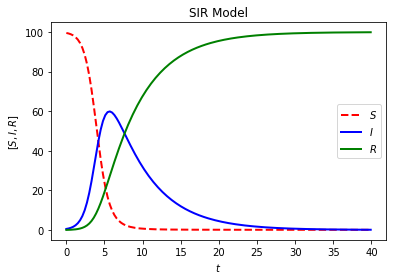

In [19]:
#Initial conditions and t range
t = np.arange(0,40, 0.3)
k0=[995,5, 0]

#Differential equation
eta = 1.5
gamma = 0.2
def f(k,t):
    S = k[0]
    I = k[1]
    R = k[2]
    dSdt = -1*eta*I*S / sum(k0)
    dIdt = eta*I*S / sum(k0) - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]


#Solve
k = odeint(f,k0,t)
k = k / sum(k0) * 100

#Plotting
plt.plot(t,k[:,0],'r--', linewidth=2.0)
plt.plot(t,k[:,1],'b-', linewidth=2.0)
plt.plot(t,k[:,2],'g-', linewidth=2.0)

#print(k[20, 0])
plt.title("SIR Model")    #'$\u03B2 =$ {}, $\gamma =$ {}'.format(eta, gamma))
plt.xlabel("$t$")
plt.ylabel("$[S, I, R]$")
plt.legend(["$S$","$I$", "$R$"])

# plt.savefig('sir.png', dpi = 1200)

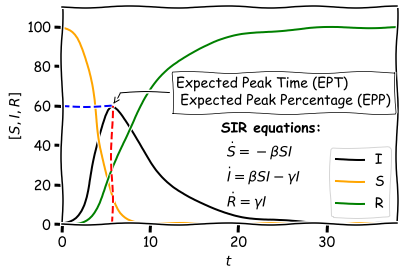

beta= 1.5 gamma= 0.2 (xmax, ymax) = 5.7 , 59.85697756153807


In [20]:
x = t
y = k[:, 1]

with plt.xkcd():  #schematic plot
    fig, ax = plt.subplots()
    ax.plot(x,y, ls = '-', c = 'black', label = 'I')

    ax.plot(t,k[:,0],'-', c = 'orange', linewidth=2.0, label = 'S')
    ax.plot(t,k[:,2],'g-', linewidth=2.0, label = 'R')

    def annot_max(x,y, ax=None):
        xmax = x[np.argmax(y)]
        ymax = y.max()
        text= "Expected Peak Time (EPT)\n Expected Peak Percentage (EPP)" #.format(xmax, ymax)
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(0.34,0.68), **kw)

    annot_max(x,y)
    ax.set_ylim([0, 110])
    ax.set_xlim([0, 38])
    xmax = x[np.argmax(y)]
    ymax = y.max()
    ax.axvline(x=xmax, ymin=0, ymax=ymax/110, ls = '--', c = 'r')
    ax.axhline(y=ymax, xmin=0, xmax=xmax/38, ls = '--', c = 'b')


    ax.set_xlabel("$t$")
    ax.set_ylabel("$[S, I, R]$")

    plt.text(18, 9, 'SIR equations:\n $\dot{S}=-\u03B2 SI$\n $\dot{I}=\u03B2 SI -\gamma I$\n $\dot{R}=\gamma I$', fontweight="bold")
    plt.legend()
    plt.show()


fig.savefig('measures.pdf', bbox_inches='tight')

print('beta=', eta, 'gamma=', gamma, '(xmax, ymax) =', xmax, ',',ymax,)


Divied population with varios $\beta$ differentiation:

In [21]:
gamma = 1/14
delta = 1
betam = 7/14

def equations(k,t):
    betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

    ST, IT, RT = k[0], k[1], k[2]
    SM, IM, RM = k[3], k[4], k[5]
    SL, IL, RL = k[6], k[7], k[8]
    I = IT + IM + IL
    S = ST + SM + SL
    #top
    dSTdt = -1*betat*I*ST
    dITdt = betat*I*ST - gamma*IT
    dRTdt = gamma*IT
    #medium
    dSMdt = -1*betam*I*SM
    dIMdt = betam*I*SM - gamma*IM
    dRMdt = gamma*IM
    #low
    dSLdt = -1*betal*I*SL
    dILdt = betal*I*SL - gamma*IL
    dRLdt = gamma*IL
    
    return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]

In [22]:
#Initial conditions and t range
t  =  np.arange(0,55, 0.001)

k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]

#Solve
k = odeint(equations,k0,t)

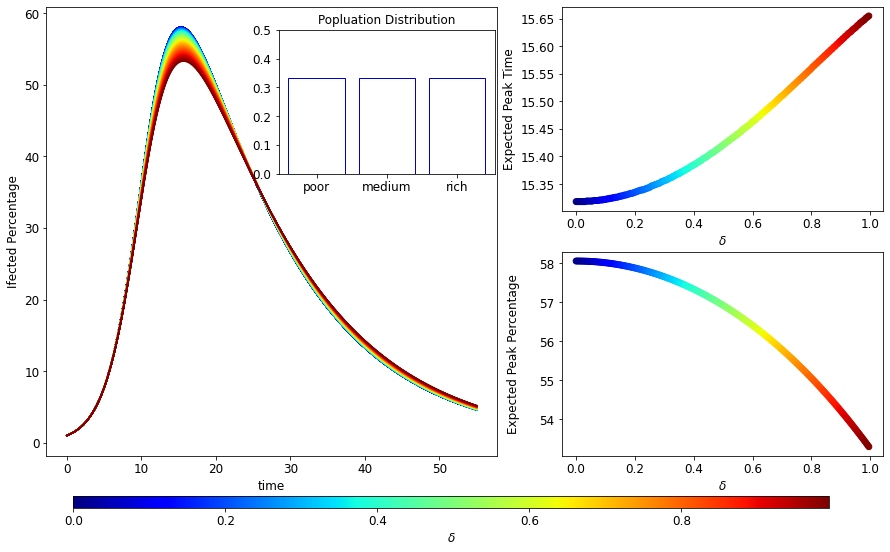

In [24]:
from matplotlib.gridspec import GridSpec
delta_range = np.arange(0, 1, 0.005)

fig = plt.figure(figsize=(15, 8))

plt.rcParams.update({'font.size': 12})
gs  = GridSpec(2, 7) 

ax1 = fig.add_subplot(gs[:,0:4]) 
ax2 = fig.add_subplot(gs[0,4:7]) 
ax3 = fig.add_subplot(gs[1,4:7]) 


normalize = mcolors.Normalize(vmin=delta_range.min(), vmax=delta_range.max())
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(delta_range)
fig.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])
cbar = plt.colorbar(scalarmappaple, orientation="horizontal", pad=0.1, cax=cbar_ax) 
cbar.set_label('$\delta$')



Imax = []
t_p = []

for delta in delta_range:
    k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]
    k = odeint(equations,k0,t)
    Itot = k[:, 1::3].sum(1)
    Imax.append(max(Itot) * 100)
    t_p.append(np.where(Itot == max(Itot))[0][0] * 0.001)
    ax1.plot(t, 100 * Itot, color = colormap(normalize(delta)))

# plt.legend(title = '$\delta$', loc = 'upper left')



# ax3.legend(title = '$\delta$', loc = 'upper left')
ax1.set_ylabel("Ifected Percentage")
ax1.set_xlabel("time")


ax2.scatter(delta_range, t_p, c = delta_range, cmap=colormap)
ax2.set_xlabel('$\delta$')
ax2.set_ylabel('Expected Peak Time')

ax3.scatter(delta_range, Imax, c = delta_range, cmap=colormap)
ax3.set_xlabel('$\delta$')
ax3.set_ylabel('Expected Peak Percentage\n ')

left, bottom, width, height = [0.34, 0.59, 0.2, 0.25]
ax4 = fig.add_axes([left, bottom, width, height])

ax4.bar(['poor', 'medium', 'rich'], [1/3, 1/3, 1/3], edgecolor = 'mediumblue', fill = False)
ax4.set_ylim(0, 0.5)
ax4.set_title('Popluation Distribution', fontsize = 12)


plt.savefig('delta.pdf', bbox_inches='tight')

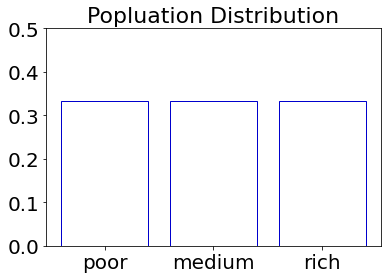

In [25]:
plt.bar(['poor', 'medium', 'rich'], [1/3, 1/3, 1/3], edgecolor = 'mediumblue', fill = False)
plt.ylim(0, 0.5)
plt.title('Popluation Distribution', fontsize = 22)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.savefig('dist1.png', dpi = 1200)

for $\Delta N$:
\begin{align}
NT = NM \epsilon\\
NL = NM (4\epsilon)\\
NM + NT + NL = 1\\
NM = \frac{1}{1+5\epsilon}
\end{align}

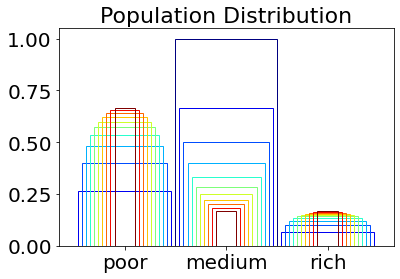

In [26]:
eps_range = np.arange(0, 1.1, 0.1)

normalize = mcolors.Normalize(vmin=eps_range.min(), vmax=eps_range.max())
colormap = cm.jet

width = 1
for epsilon in eps_range:
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon
    plt.bar(['poor', 'medium', 'rich'], [L, M, T], fill=False, label = f'{round(epsilon, 1)}',
             edgecolor = colormap(normalize(epsilon)), width = width)
    width = width - 0.08

plt.title("Population Distribution", fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
# scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
# scalarmappaple.set_array(delta_range)
# plt.colorbar(scalarmappaple)


# plt.savefig('dist2.png', dpi = 1200)

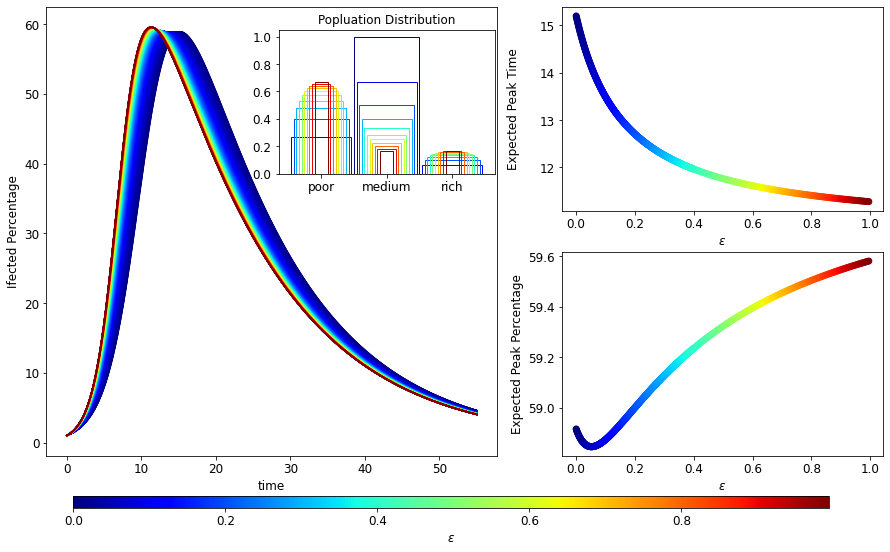

In [27]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 8))

plt.rcParams.update({'font.size': 12})
gs  = GridSpec(2, 7) 

ax1 = fig.add_subplot(gs[:,0:4]) 
ax2 = fig.add_subplot(gs[0,4:7]) 
ax3 = fig.add_subplot(gs[1,4:7]) 


normalize = mcolors.Normalize(vmin=delta_range.min(), vmax=delta_range.max())
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(eps_range)
fig.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])
cbar = plt.colorbar(scalarmappaple, orientation="horizontal", pad=0.1, cax=cbar_ax) 
cbar.set_label('$\epsilon$')



delta = 1.5
eps_range = np.arange(0, 1, 0.005)
eps_range = np.append(np.arange(0, 0.4, 0.001), np.arange(0.4, 1, 0.005))
Imax = []
t_p = []

t  =  np.arange(0,55, 0.001)


for epsilon in eps_range:
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon
    k0 = [T, 0, 0, M, 0.01, 0, L, 0, 0]
    k = odeint(equations,k0,t)
    Itot = k[:, 1::3].sum(1)
    Imax.append(max(Itot) * 100)
    t_p.append(np.where(Itot == max(Itot))[0][0] * 0.001)
    ax1.plot(t, Itot * 100, label = f'{round(epsilon, 1)}', color = colormap(normalize(epsilon)))
    

ax1.set_ylabel("Ifected Percentage")
ax1.set_xlabel("time")


ax2.scatter(eps_range, t_p, c = eps_range, cmap=colormap)
ax2.set_xlabel('$\epsilon$')
ax2.set_ylabel('Expected Peak Time\n ')

ax3.scatter(eps_range, Imax, c = eps_range, cmap=colormap)
ax3.set_xlabel('$\epsilon$')
ax3.set_ylabel('Expected Peak Percentage')


left, bottom, width, height = [0.34, 0.59, 0.2, 0.25]
ax4 = fig.add_axes([left, bottom, width, height])

eps_range = np.arange(0, 1.1, 0.1)

width = 1
for epsilon in eps_range:
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon
    ax4.bar(['poor', 'medium', 'rich'], [L, M, T], fill=False, label = f'{round(epsilon, 1)}',
             edgecolor = colormap(normalize(epsilon)), width = width)
    width = width - 0.08

ax4.set_title('Popluation Distribution', fontsize = 12)


plt.savefig('pop.pdf', bbox_inches='tight')

## Gini Coefficient
Gini Coefficient calculation for $\epsilon$:

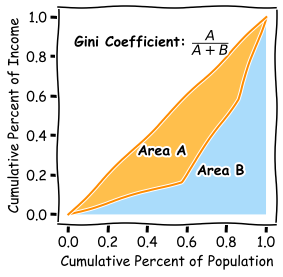

In [28]:
epsilon = 0.5
AL, AM, AT = 1, 5, 10 #Assets of each group


M = 1/ (1 + 5 * epsilon)
T, L = M * epsilon, 4 * M * epsilon


points = np.zeros((4, 2))
points[1] = [L, (AL*L) / (AL*L + AM*M + AT*T)]
points[2] = [L + M, (AL*L + AM*M) / (AL*L + AM*M + AT*T)]
points[3] = [1, 1]

with plt.xkcd():
    plt.fill_between(points[:, 0], points[:, 1], points[:, 0], fc = 'orange', alpha = 0.7)
    plt.fill_between(points[:, 0], [0, 0, 0, 0], points[:, 1], fc = 'lightskyblue', alpha = 0.7)

    plt.plot(points[:, 0], points[:, 1], c = 'darkorange')

    plt.plot([0, 1], [0, 1], c = 'darkorange')

    angle = 0
    plt.text(0.35, 0.3, 'Area A', fontweight="bold", rotation = angle)
    plt.text(0.65, 0.2, 'Area B', fontweight="bold", rotation = angle)
    plt.text(0.03, 0.85, 'Gini Coefficient: $\dfrac{A}{A+B}$', fontweight="bold", rotation = angle)
    plt.axis('scaled')

    plt.ylabel('Cumulative Percent of Income')
    plt.xlabel('Cumulative Percent of Population')

plt.savefig('ginideff.png', bbox_inches='tight')


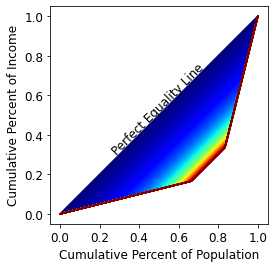

In [29]:
from shapely.geometry import Polygon

AL, AM, AT = 1, 4, 16 #Assets of each group 
gini = []
eps_range = np.append(np.arange(0, 0.4, 0.001), np.arange(0.4, 1, 0.005))

for epsilon in eps_range:
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon


    points = np.zeros((4, 2))
    points[1] = [L, (AL*L) / (AL*L + AM*M + AT*T)]
    points[2] = [L + M, (AL*L + AM*M) / (AL*L + AM*M + AT*T)]
    points[3] = [1, 1]

    plt.plot(points[:, 0], points[:, 1], color = colormap(normalize(epsilon)))

    pgon = Polygon(points)
    gini.append((pgon.area * 2))
    
plt.ylabel('Cumulative Percent of Income')
plt.xlabel('Cumulative Percent of Population')
angle = 45
plt.text(0.25, 0.3, 'Perfect Equality Line', fontweight="normal", rotation = angle)
plt.axis('scaled')   

plt.savefig('simugini.png', dpi = 1200)    


# plt.figure()
# plt.plot(eps_range, gini, c = 'b')
# plt.ylabel("Gini Coefficient")
# plt.xlabel("$\epsilon$")
# scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
# scalarmappaple.set_array(delta_range)
# plt.colorbar(scalarmappaple)

# plt.savefig('simueps.png', dpi = 1200, bbox_inches='tight')

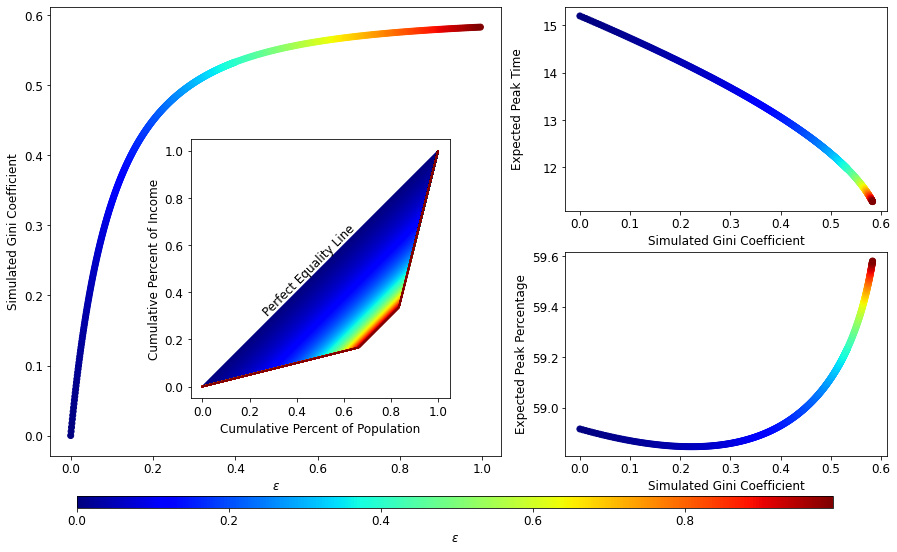

In [30]:
from matplotlib.gridspec import GridSpec
from shapely.geometry import Polygon

fig = plt.figure(figsize=(15, 8))

plt.rcParams.update({'font.size': 12})
gs  = GridSpec(2, 7) 

ax1 = fig.add_subplot(gs[:,0:4]) 
ax2 = fig.add_subplot(gs[0,4:7]) 
ax3 = fig.add_subplot(gs[1,4:7]) 


normalize = mcolors.Normalize(vmin=delta_range.min(), vmax=delta_range.max())
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(eps_range)
fig.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])
cbar = plt.colorbar(scalarmappaple, orientation="horizontal", pad=0.1, cax=cbar_ax) 
cbar.set_label('$\epsilon$')


ax1.scatter(eps_range, gini, c = eps_range, cmap = colormap)
ax1.set_ylabel("Simulated Gini Coefficient")
ax1.set_xlabel("$\epsilon$")


ax2.scatter(gini, t_p, c = eps_range, cmap = colormap)
ax2.set_ylabel('Expected Peak Time\n ')
ax2.set_xlabel('Simulated Gini Coefficient')

ax3.scatter(gini, Imax, c = eps_range, cmap = colormap)
ax3.set_ylabel('Expected Peak Percentage')
ax3.set_xlabel('Simulated Gini Coefficient')


left, bottom, width, height = [0.15, 0.2, 0.45, 0.45]
ax4 = fig.add_axes([left, bottom, width, height])

AL, AM, AT = 1, 4, 16 #Assets of each group 
gini = []
eps_range = np.append(np.arange(0, 0.4, 0.001), np.arange(0.4, 1, 0.005))

for epsilon in eps_range:
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon


    points = np.zeros((4, 2))
    points[1] = [L, (AL*L) / (AL*L + AM*M + AT*T)]
    points[2] = [L + M, (AL*L + AM*M) / (AL*L + AM*M + AT*T)]
    points[3] = [1, 1]

    ax4.plot(points[:, 0], points[:, 1], color = colormap(normalize(epsilon)))

    pgon = Polygon(points)
    gini.append((pgon.area * 2))
    
ax4.set_ylabel('Cumulative Percent of Income')
ax4.set_xlabel('Cumulative Percent of Population')
angle = 45
ax4.text(0.25, 0.3, 'Perfect Equality Line', fontweight="normal", rotation = angle)
ax4.axis('scaled')   



plt.savefig('simueps.pdf', bbox_inches='tight')